In [174]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Read data & Preprocessing

##Sales Preprocessing

In [176]:
sales = pd.read_csv('/content/gdrive/MyDrive/CEL/sales_test.csv')
sales.head()

,Order No,Order Date,Line No,Ship To Address No,Item Code,Order Qty,Quantity Shipped
0,528758,2017-01-03,1,1358538.0,111931,70.0,70.0
1,528791,2017-01-03,1,1254798.0,1029071,10.0,10.0
2,528791,2017-01-03,2,1254798.0,1033341,10.0,10.0
3,528791,2017-01-03,3,1254798.0,1040827,5.0,5.0
4,528791,2017-01-03,4,1254798.0,10106111,10.0,10.0


In [177]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28315 entries, 0 to 28314
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Order No            28315 non-null  int64  
 1   Order Date          28315 non-null  object 
 2   Line No             28315 non-null  int64  
 3   Ship To Address No  28315 non-null  float64
 4   Item Code           28315 non-null  int64  
 5   Order Qty           28315 non-null  float64
 6   Quantity Shipped    28315 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 1.5+ MB


In [178]:
(sales.isna().sum()).sort_values(ascending = False)

Order No              0
Order Date            0
Line No               0
Ship To Address No    0
Item Code             0
Order Qty             0
Quantity Shipped      0
dtype: int64

In [179]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'], format = '%Y-%m-%d')
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28315 entries, 0 to 28314
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Order No            28315 non-null  int64         
 1   Order Date          28315 non-null  datetime64[ns]
 2   Line No             28315 non-null  int64         
 3   Ship To Address No  28315 non-null  float64       
 4   Item Code           28315 non-null  int64         
 5   Order Qty           28315 non-null  float64       
 6   Quantity Shipped    28315 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 1.5 MB


In [180]:
sales.duplicated().sum()

0

##Canceled Preprocessing

In [181]:
canceled = pd.read_csv('/content/gdrive/MyDrive/CEL/canceled_test.csv')
canceled.head()

,Order Number,Line Number,Order Date,Ship To Address No,Item Code,Quantity Ordered,Quantity Canceled
0,528703,1,2017-01-03,1857566.0,10135139,1,1
1,528705,1,2017-01-03,1857566.0,10135140,1,1
2,528706,2,2017-01-03,1857566.0,10135138,1,1
3,528707,1,2017-01-03,1857566.0,10135132,1,1
4,528708,1,2017-01-03,1857566.0,10135359,1,1


In [182]:
canceled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3662 entries, 0 to 3661
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Order Number        3662 non-null   int64  
 1   Line Number         3662 non-null   int64  
 2   Order Date          3662 non-null   object 
 3   Ship To Address No  3662 non-null   float64
 4   Item Code           3662 non-null   int64  
 5   Quantity Ordered    3662 non-null   int64  
 6   Quantity Canceled   3662 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 200.4+ KB


In [183]:
(canceled.isna().sum()).sort_values(ascending = False)

Order Number          0
Line Number           0
Order Date            0
Ship To Address No    0
Item Code             0
Quantity Ordered      0
Quantity Canceled     0
dtype: int64

In [184]:
canceled['Order Date'] = pd.to_datetime(canceled['Order Date'], format = '%Y-%m-%d')
canceled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3662 entries, 0 to 3661
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Order Number        3662 non-null   int64         
 1   Line Number         3662 non-null   int64         
 2   Order Date          3662 non-null   datetime64[ns]
 3   Ship To Address No  3662 non-null   float64       
 4   Item Code           3662 non-null   int64         
 5   Quantity Ordered    3662 non-null   int64         
 6   Quantity Canceled   3662 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 200.4 KB


In [185]:
canceled.duplicated().sum()

0

#Overview

<h> Total successfully delivered orders by Item Code

In [199]:
sucess_delivery = sales.groupby('Item Code')['Quantity Shipped', 'Order Qty'].sum()
sucess_delivery['Service Level'] = sucess_delivery['Quantity Shipped'] / sucess_delivery['Order Qty']

<ipython-input-199-08cb7b7de633>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sucess_delivery = sales.groupby('Item Code')['Quantity Shipped', 'Order Qty'].sum()


In [200]:
sucess_delivery['Service Level']
sucess_delivery['Service Level'] = sucess_delivery['Service Level'].apply(lambda x: '{:.2%}'.format(x))
sucess_delivery['Service Level'].value_counts()

100.00%    64
Name: Service Level, dtype: int64

<h> Total cancelled order by Item Code

In [202]:
total_cancell = canceled.groupby('Item Code')['Quantity Canceled', 'Quantity Ordered'].sum()
total_cancell['Service Level'] = total_cancell['Quantity Canceled'] / total_cancell['Quantity Ordered']

<ipython-input-202-7ed7d05275b3>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_cancell = canceled.groupby('Item Code')['Quantity Canceled', 'Quantity Ordered'].sum()


In [203]:
total_cancell['Service Level']
total_cancell['Service Level'] = total_cancell['Service Level'].apply(lambda x: '{:.2%}'.format(x))
total_cancell['Service Level'].value_counts()

100.00%    73
Name: Service Level, dtype: int64

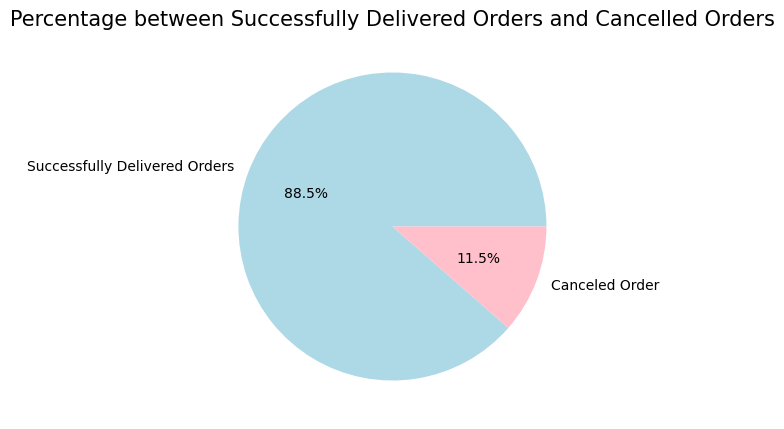

In [205]:
y = [len(sales), len(canceled)]
x = ['Successfully Delivered Orders', 'Canceled Order']
colors = ['lightblue', 'pink']
plt.figure(figsize = (5,5))
plt.pie(y, labels=x, colors=colors, autopct='%1.1f%%')
plt.title('Percentage between Successfully Delivered Orders and Cancelled Orders', fontsize = 15)
plt.show()

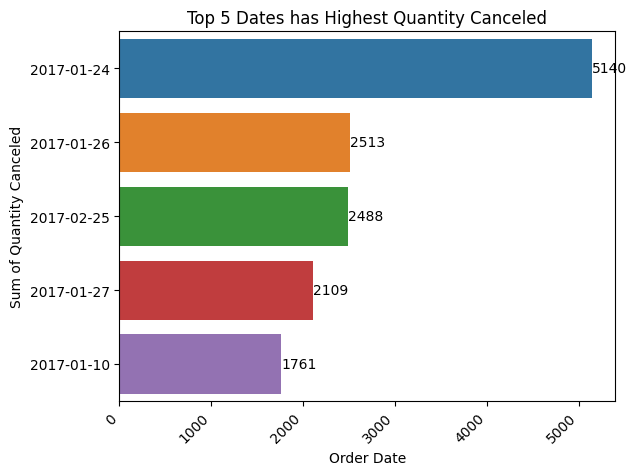

In [187]:
top_5_date_canceled = canceled.groupby(canceled['Order Date'].dt.date)['Quantity Canceled'].sum().reset_index(name = 'sum').nlargest(5, 'sum')
sns.barplot(data =top_5_date_canceled,x='sum', y='Order Date', orient='horizontal')
plt.xlabel('Order Date')
plt.ylabel('Sum of Quantity Canceled')
plt.title('Top 5 Dates has Highest Quantity Canceled')
plt.xticks(rotation=45, ha='right')
for i, count in enumerate(top_5_date_canceled['sum']):
  plt.annotate(str(count), (count, i), ha = 'left', va = 'center')
plt.show()

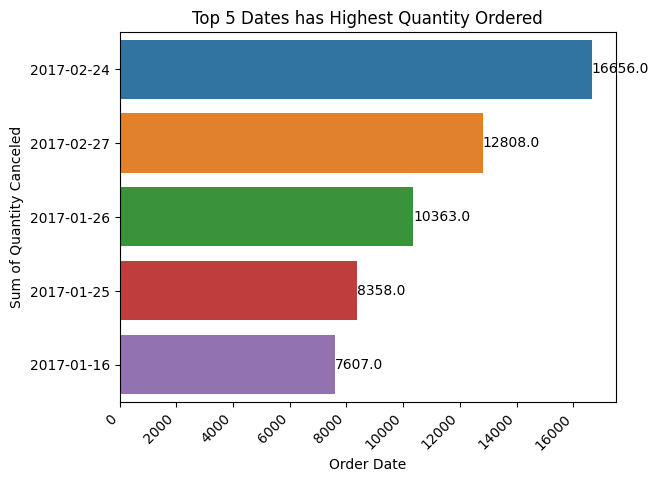

In [188]:
top_5_order_date = sales.groupby(sales['Order Date'].dt.date)['Quantity Shipped'].sum().reset_index(name = 'sum').nlargest(5, 'sum')
sns.barplot(data = top_5_order_date, x = 'sum', y = 'Order Date', orient = 'horizontal')
plt.xlabel('Order Date')
plt.ylabel('Sum of Quantity Canceled')
plt.title('Top 5 Dates has Highest Quantity Ordered')
plt.xticks(rotation=45, ha='right')
for i, count in enumerate(top_5_order_date['sum']):
  plt.annotate(str(count), (count, i), ha ='left', va = 'center')
plt.show()

#SALES Analysis

In [206]:
sales.head()

,Order No,Order Date,Line No,Ship To Address No,Item Code,Order Qty,Quantity Shipped
0,528758,2017-01-03,1,1358538.0,111931,70.0,70.0
1,528791,2017-01-03,1,1254798.0,1029071,10.0,10.0
2,528791,2017-01-03,2,1254798.0,1033341,10.0,10.0
3,528791,2017-01-03,3,1254798.0,1040827,5.0,5.0
4,528791,2017-01-03,4,1254798.0,10106111,10.0,10.0


In [271]:
df = sales.copy()

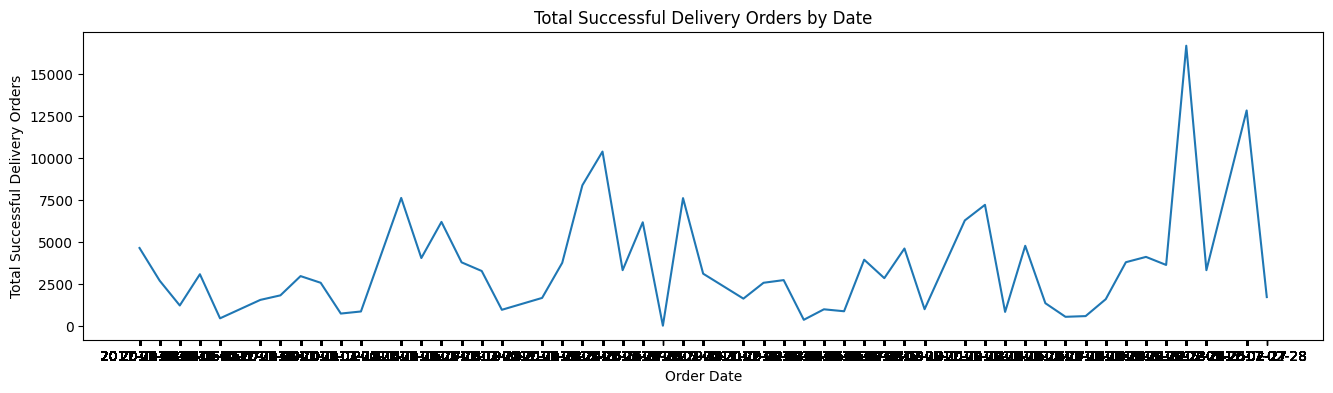

In [214]:
plt.figure(figsize = (16, 4))
order_per_date = df.groupby(df['Order Date'].dt.date)['Order Qty'].sum().reset_index(name = 'Total Successful Delivery Orders')
sns.lineplot(data = order_per_date, x = 'Order Date', y = 'Total Successful Delivery Orders')
plt.title("Total Successful Delivery Orders by Date")
plt.xticks(df['Order Date'])
plt.show()

In [ ]:
df['month'] = df['Order Date'].dt.month
df.month

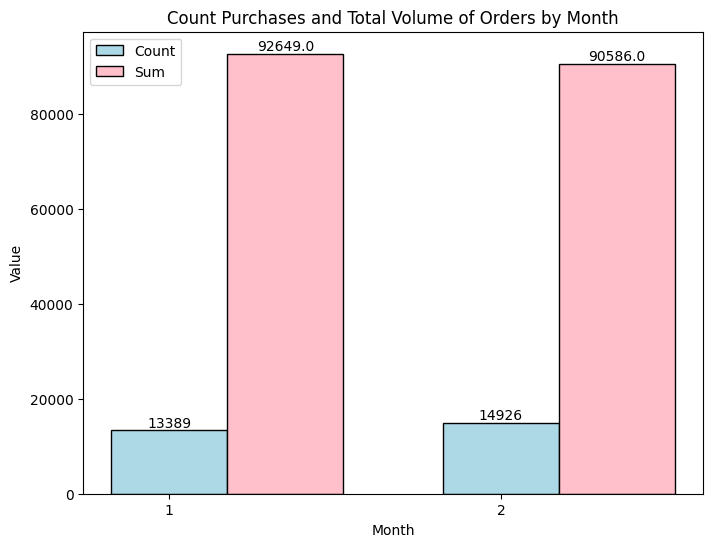

In [216]:
sales_month_count = df.groupby('month')['Order Qty'].size().reset_index(name='count')
sales_month_sum = df.groupby('month')['Order Qty'].sum().reset_index(name='sum')

width = 0.35
r = np.arange(len(sales_month_count['month']))
fig, ax = plt.subplots(figsize=(8, 6))


ax.bar(r, sales_month_count['count'], color='lightblue', width=width, edgecolor='black', label='Count')
ax.bar(r+width, sales_month_sum['sum'], color='pink', width=width, edgecolor='black', label='Sum')
ax.set_xlabel('Month')
ax.set_ylabel('Value')
ax.set_title('Count Purchases and Total Volume of Orders by Month')
ax.legend()
ax.set_xticks(r)
ax.set_xticklabels(sales_month_count['month'])

for i, count in enumerate(sales_month_count['count']):
    ax.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
for i, total in enumerate(sales_month_sum['sum']):
    ax.text(i + width, total, str(total), ha='center', va='bottom', fontsize=10)

plt.show()


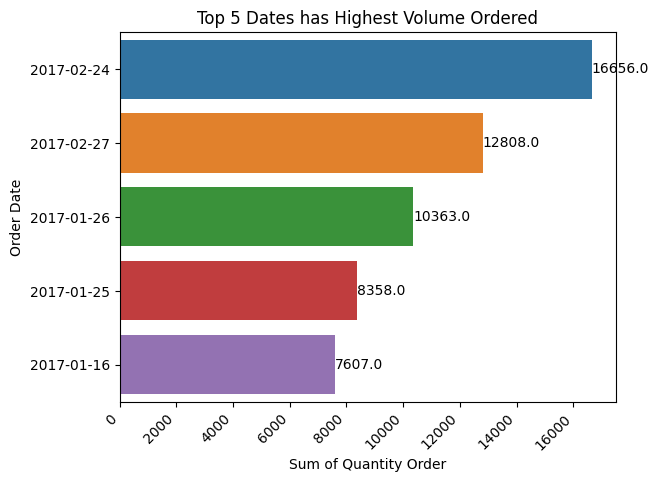

In [226]:
top_5_order_date = df.groupby(df['Order Date'].dt.date)['Quantity Shipped'].sum().reset_index(name = 'sum').nlargest(5, 'sum')
sns.barplot(data = top_5_order_date, x = 'sum', y = 'Order Date', orient = 'horizontal')
plt.ylabel('Order Date')
plt.xlabel('Sum of Quantity Order')
plt.title('Top 5 Dates has Highest Volume Ordered')
plt.xticks(rotation=45, ha='right')
for i, count in enumerate(top_5_order_date['sum']):
  plt.annotate(str(count), (count, i), ha ='left', va = 'center')
plt.show()

In [220]:
df.columns

Index(['Order No', 'Order Date', 'Line No', 'Ship To Address No', 'Item Code',
       'Order Qty', 'Quantity Shipped', 'month'],
      dtype='object')

In [242]:
Itemcount = df.groupby('Item Code')['Quantity Shipped'].sum().reset_index(name = 'sum')
print(Itemcount)

    Item Code      sum
0      110441   9600.0
1      111931  15575.0
2      113106    908.0
3     1029069    188.0
4     1029070    443.0
..        ...      ...
59   10137995    285.0
60   10137996   1588.0
61   10138004    612.0
62   10138005    274.0
63   10138006    364.0

[64 rows x 2 columns]


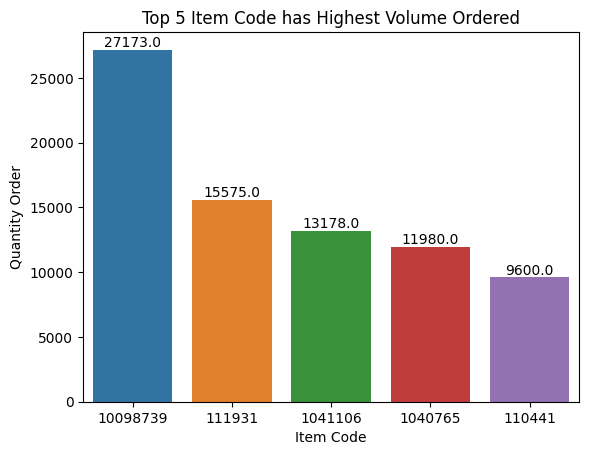

In [243]:
Itemcount_sorted_max = Itemcount.nlargest(5, 'sum').sort_values('sum', ascending=False)

sns.barplot(data = Itemcount_sorted_max, x = 'Item Code', y = 'sum', order=Itemcount_sorted_max['Item Code'])
plt.xlabel('Item Code')
plt.ylabel('Quantity Order')
plt.title('Top 5 Item Code has Highest Volume Ordered')
for i, count in enumerate(Itemcount_sorted_max['sum']):
    plt.annotate(str(count), (i, count), ha='center', va='bottom')
plt.show()

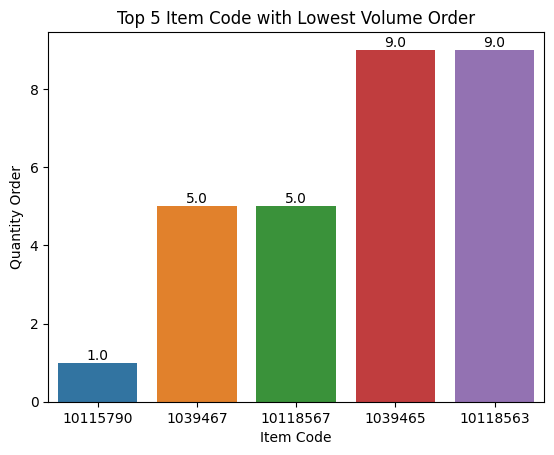

In [244]:
Itemcount_sorted_low = Itemcount.nsmallest(5, 'sum')
Itemcount_sorted_low = Itemcount_sorted_low.sort_values('sum')
sns.barplot(data=Itemcount_sorted_low, x='Item Code', y='sum', order = Itemcount_sorted_low['Item Code'])
plt.xlabel('Item Code')
plt.ylabel('Quantity Order')
plt.title('Top 5 Item Code with Lowest Volume Order')
for i, count in enumerate(Itemcount_sorted_low['sum']):
    plt.annotate(str(count), (i, count), ha='center', va='bottom')
plt.show()


<ipython-input-251-7eb552c8e79d>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Accent')


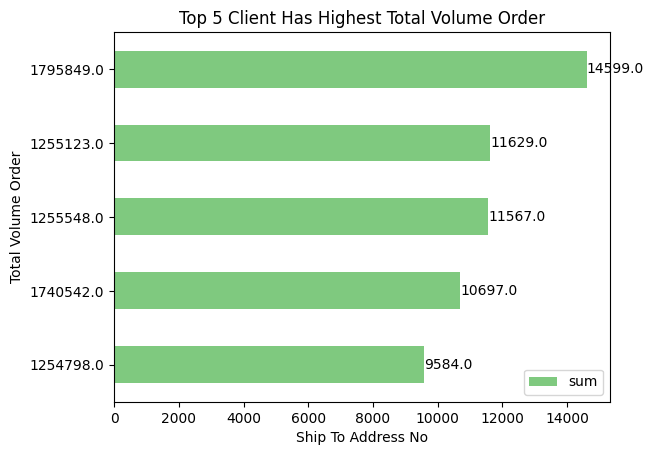

In [251]:
import matplotlib.cm as cm


ship_adress_count = df['Ship To Address No'].value_counts().nlargest(5).sort_values(ascending=True)
ship_adress_count1 = df.groupby('Ship To Address No')['Order Qty'].sum().reset_index(name = 'sum')
top_5_ship_adress_vol = ship_adress_count1.nlargest(5, 'sum').sort_values(ascending = True, by = 'sum')

cmap = cm.get_cmap('Accent')
number = ship_adress_count1['Ship To Address No'].nunique()
colors = [cmap(i/number) for i in range(number)]

top_5_ship_adress_vol.plot(kind ='barh', x = 'Ship To Address No', y ='sum', color = colors)
plt.xlabel('Ship To Address No')
plt.ylabel('Total Volume Order')
plt.title('Top 5 Client Has Highest Total Volume Order')

for i, count in enumerate(top_5_ship_adress_vol['sum']):
    plt.annotate(str(count), (count, i), ha='left', va='center')

plt.show()

#CANCELED Analysis

In [272]:
df1 = canceled.copy()
df1.head()

,Order Number,Line Number,Order Date,Ship To Address No,Item Code,Quantity Ordered,Quantity Canceled
0,528703,1,2017-01-03,1857566.0,10135139,1,1
1,528705,1,2017-01-03,1857566.0,10135140,1,1
2,528706,2,2017-01-03,1857566.0,10135138,1,1
3,528707,1,2017-01-03,1857566.0,10135132,1,1
4,528708,1,2017-01-03,1857566.0,10135359,1,1


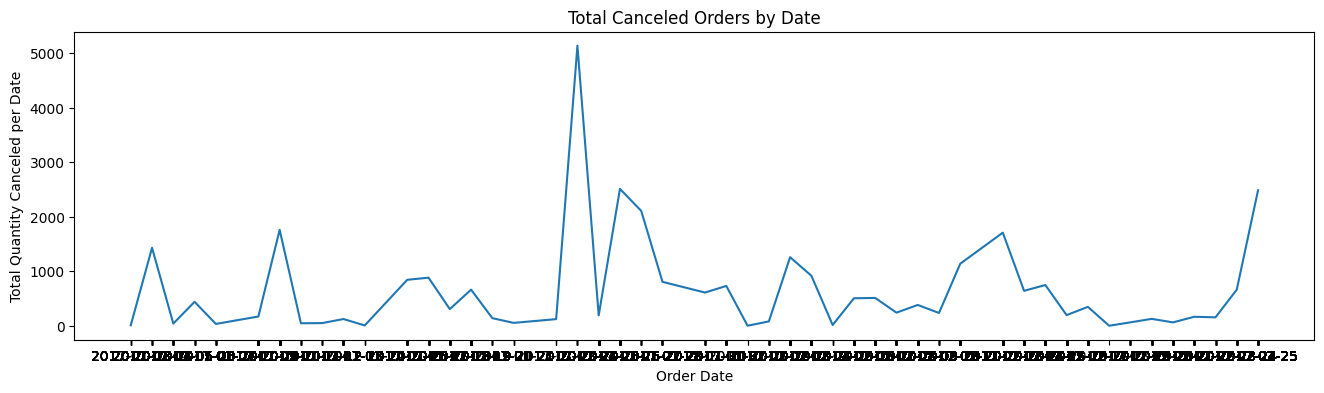

In [255]:
plt.figure(figsize = (16,4))
canceled_per_date = df1.groupby(df1['Order Date'].dt.date)['Quantity Canceled'].sum().reset_index(name = 'Total Quantity Canceled per Date')
sns.lineplot(data = canceled_per_date, x = 'Order Date', y = 'Total Quantity Canceled per Date')
plt.title("Total Canceled Orders by Date")
plt.xticks(df1['Order Date'])
plt.show()

In [276]:
df1['month'] = df1['Order Date'].dt.month
df1.month

0       1
1       1
2       1
3       1
4       1
       ..
3657    2
3658    2
3659    2
3660    2
3661    2
Name: month, Length: 3662, dtype: int64

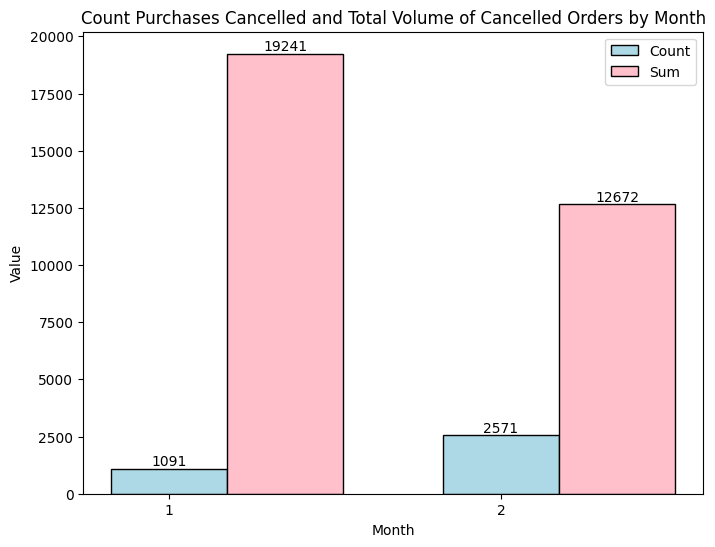

In [277]:
canceled_month_count = df1.groupby('month')['Quantity Canceled'].size().reset_index(name='count')
canceled_month_sum = df1.groupby('month')['Quantity Canceled'].sum().reset_index(name='sum')

width = 0.35
r = np.arange(len(canceled_month_count['month']))
fig, ax = plt.subplots(figsize=(8, 6))


ax.bar(r, canceled_month_count['count'], color='lightblue', width=width, edgecolor='black', label='Count')
ax.bar(r+width, canceled_month_sum['sum'], color='pink', width=width, edgecolor='black', label='Sum')
ax.set_xlabel('Month')
ax.set_ylabel('Value')
ax.set_title('Count Purchases Cancelled and Total Volume of Cancelled Orders by Month')
ax.legend()
ax.set_xticks(r)
ax.set_xticklabels(canceled_month_count['month'])

for i, count in enumerate(canceled_month_count['count']):
    ax.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
for i, total in enumerate(canceled_month_sum['sum']):
    ax.text(i + width, total, str(total), ha='center', va='bottom', fontsize=10)
    
plt.show()


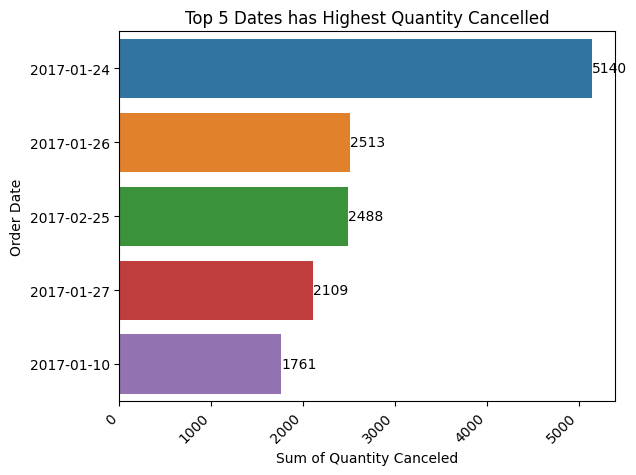

In [278]:
top_5_date_canceled = df1.groupby(df1['Order Date'].dt.date)['Quantity Canceled'].sum().reset_index(name = 'sum').nlargest(5, 'sum')
sns.barplot(data =top_5_date_canceled,x='sum', y='Order Date', orient='horizontal')
plt.ylabel('Order Date')
plt.xlabel('Sum of Quantity Canceled')
plt.title('Top 5 Dates has Highest Quantity Cancelled')
plt.xticks(rotation=45, ha='right')
for i, count in enumerate(top_5_date_canceled['sum']):
  plt.annotate(str(count), (count, i), ha = 'left', va = 'center')
plt.show()

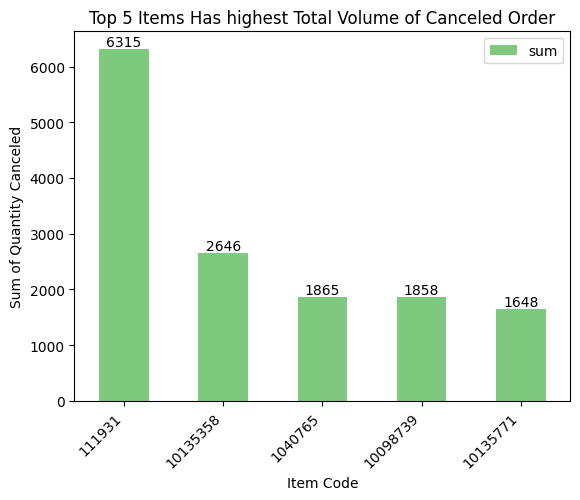

In [281]:
Itemcount1 = df1.groupby('Item Code')['Quantity Canceled'].sum().reset_index(name = 'sum')
top_5_items_vol = Itemcount1.nlargest(5, 'sum')
top_5_items_vol.plot(kind ='bar', x = 'Item Code', y ='sum', color = colors)
plt.xlabel('Item Code')
plt.ylabel('Sum of Quantity Canceled')
plt.title('Top 5 Items Has highest Total Volume of Canceled Order')
plt.xticks(rotation=45, ha='right')
for i, count in enumerate(top_5_items_vol['sum']):
    plt.annotate(str(count), (i, count), ha='center', va='bottom')

plt.show()

<ipython-input-286-e70176e0e019>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Accent')


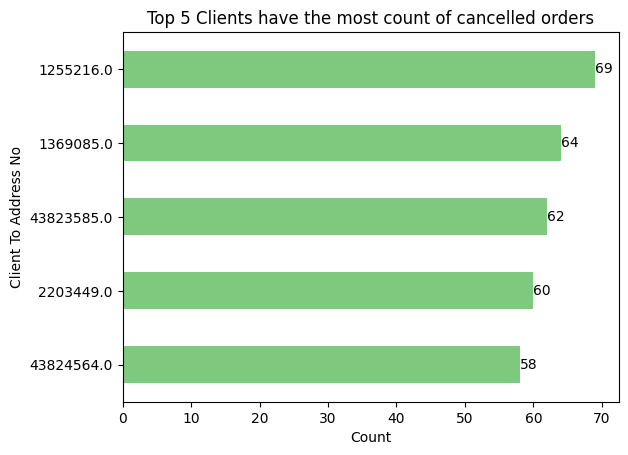

In [286]:
import matplotlib.cm as cm

cmap = cm.get_cmap('Accent')
number = df1['Ship To Address No'].nunique()
colors = [cmap(i/number) for i in range(number)]
ship_adress_count = df1['Ship To Address No'].value_counts().nlargest(5).sort_values(ascending=True)

fig, ax = plt.subplots()
ship_adress_count.plot(kind='barh', color=colors)

for i, count in enumerate(ship_adress_count):
    ax.annotate(str(count), xy=(count, i), ha='left', va='center')

plt.xlabel('Count')
plt.ylabel('Client To Address No')
plt.title('Top 5 Clients have the most count of cancelled orders')
plt.show()

#ABC Classification (SKU)

In [482]:
sales.head()

,Order No,Order Date,Line No,Ship To Address No,Item Code,Order Qty,Quantity Shipped
0,528758,2017-01-03,1,1358538.0,111931,70.0,70.0
1,528791,2017-01-03,1,1254798.0,1029071,10.0,10.0
2,528791,2017-01-03,2,1254798.0,1033341,10.0,10.0
3,528791,2017-01-03,3,1254798.0,1040827,5.0,5.0
4,528791,2017-01-03,4,1254798.0,10106111,10.0,10.0


In [483]:
abc = sales.copy()
abc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28315 entries, 0 to 28314
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Order No            28315 non-null  int64         
 1   Order Date          28315 non-null  datetime64[ns]
 2   Line No             28315 non-null  int64         
 3   Ship To Address No  28315 non-null  float64       
 4   Item Code           28315 non-null  int64         
 5   Order Qty           28315 non-null  float64       
 6   Quantity Shipped    28315 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 1.5 MB


In [484]:
abc.sort_values(['Item Code','Quantity Shipped'], ascending=[True,False],inplace=True)

abc['Percentage'] = (abc['Quantity Shipped']/abc.groupby(abc['Item Code'])['Quantity Shipped'].transform('sum'))*100

abc['Cummulative_percentage'] = abc.groupby('Item Code')['Percentage'].cumsum()
abc

,Order No,Order Date,Line No,Ship To Address No,Item Code,Order Qty,Quantity Shipped,Percentage,Cummulative_percentage
20076,539523,2017-02-13,11,1254798.0,110441,500.0,500.0,5.208333,5.208333
20454,539670,2017-02-14,12,1740542.0,110441,400.0,400.0,4.166667,9.375000
27240,543294,2017-02-24,15,1740542.0,110441,400.0,400.0,4.166667,13.541667
10,528791,2017-01-03,10,1254798.0,110441,300.0,300.0,3.125000,16.666667
26765,543044,2017-02-24,12,1825549.0,110441,250.0,250.0,2.604167,19.270833
...,...,...,...,...,...,...,...,...,...
27887,543659,2017-02-27,2,1352917.0,10138006,1.0,1.0,0.274725,98.901099
27905,543662,2017-02-27,3,1464940.0,10138006,1.0,1.0,0.274725,99.175824
27930,543665,2017-02-27,2,1255216.0,10138006,1.0,1.0,0.274725,99.450549
27944,543666,2017-02-27,4,1265792.0,10138006,1.0,1.0,0.274725,99.725275


In [485]:
def category(value):
  if value < 80:
    return 'A'
  elif (value >= 80) & (value <= 95):
    return 'B'
  else:
    return 'C'

In [486]:
abc['Category'] = abc['Cummulative_percentage'].apply(lambda x: category(x))

In [487]:
abc[abc['Category'] == 'C']

,Order No,Order Date,Line No,Ship To Address No,Item Code,Order Qty,Quantity Shipped,Percentage,Cummulative_percentage,Category
14858,536870,2017-02-03,2,43824713.0,110441,1.0,1.0,0.010417,95.010417,C
14861,536872,2017-02-03,2,2075220.0,110441,1.0,1.0,0.010417,95.020833,C
14872,536875,2017-02-03,5,43824723.0,110441,1.0,1.0,0.010417,95.031250,C
14890,536877,2017-02-03,10,43824721.0,110441,1.0,1.0,0.010417,95.041667,C
14922,536882,2017-02-03,2,2247914.0,110441,1.0,1.0,0.010417,95.052083,C
...,...,...,...,...,...,...,...,...,...,...
27887,543659,2017-02-27,2,1352917.0,10138006,1.0,1.0,0.274725,98.901099,C
27905,543662,2017-02-27,3,1464940.0,10138006,1.0,1.0,0.274725,99.175824,C
27930,543665,2017-02-27,2,1255216.0,10138006,1.0,1.0,0.274725,99.450549,C
27944,543666,2017-02-27,4,1265792.0,10138006,1.0,1.0,0.274725,99.725275,C


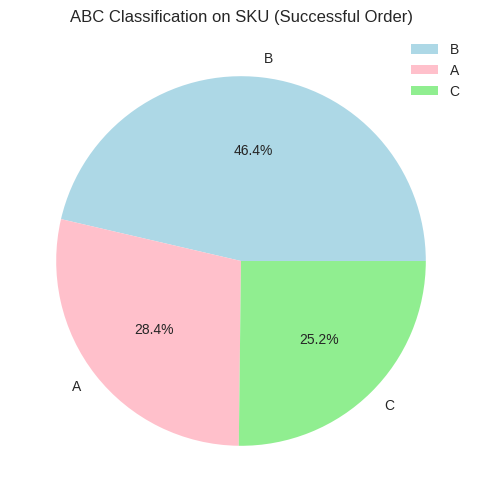

In [488]:
plt.figure(figsize = (12,6))
abc['Category'].value_counts().plot(kind = 'pie', autopct = "%1.1f%%", colors = ['lightblue', 'pink', 'lightgreen'])
plt.title('ABC Classification on SKU (Successful Order)', fontsize = 12)
plt.legend(loc = 'best')
plt.axis('off')
plt.show()

In [489]:
print('Total Order of Category A:', abc[abc.Category == 'A']['Quantity Shipped'].sum())
print('Total Order of Category B:', abc[abc.Category == 'B']['Quantity Shipped'].sum())
print('Total Order of Category C:', abc[abc.Category == 'C']['Quantity Shipped'].sum())

Total Order of Category A: 145944.0
Total Order of Category B: 27771.0
Total Order of Category C: 9520.0


#ABC Classification (Client)

In [471]:
sales.head()

,Order No,Order Date,Line No,Ship To Address No,Item Code,Order Qty,Quantity Shipped
0,528758,2017-01-03,1,1358538.0,111931,70.0,70.0
1,528791,2017-01-03,1,1254798.0,1029071,10.0,10.0
2,528791,2017-01-03,2,1254798.0,1033341,10.0,10.0
3,528791,2017-01-03,3,1254798.0,1040827,5.0,5.0
4,528791,2017-01-03,4,1254798.0,10106111,10.0,10.0


In [472]:
abc1 = sales.copy()
abc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28315 entries, 0 to 28314
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Order No            28315 non-null  int64         
 1   Order Date          28315 non-null  datetime64[ns]
 2   Line No             28315 non-null  int64         
 3   Ship To Address No  28315 non-null  float64       
 4   Item Code           28315 non-null  int64         
 5   Order Qty           28315 non-null  float64       
 6   Quantity Shipped    28315 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 1.5 MB


In [473]:
abc1.sort_values(['Ship To Address No','Quantity Shipped'], ascending=[True,False],inplace=True)

abc1['Percentage'] = (abc1['Quantity Shipped']/abc1.groupby(abc1['Ship To Address No'])['Quantity Shipped'].transform('sum'))*100

abc1['Cummulative_percentage'] = abc1.groupby('Ship To Address No')['Percentage'].cumsum()
abc1

,Order No,Order Date,Line No,Ship To Address No,Item Code,Order Qty,Quantity Shipped,Percentage,Cummulative_percentage
3073,530565,2017-01-10,4,1254612.0,10098739,48.0,48.0,3.411514,3.411514
19048,538884,2017-02-10,4,1254612.0,10098739,36.0,36.0,2.558635,5.970149
8756,533320,2017-01-20,5,1254612.0,10098739,35.0,35.0,2.487562,8.457711
13727,536131,2017-02-02,1,1254612.0,10135358,30.0,30.0,2.132196,10.589908
15219,536954,2017-02-03,6,1254612.0,1040774,30.0,30.0,2.132196,12.722104
...,...,...,...,...,...,...,...,...,...
27064,543203,2017-02-24,2,43825356.0,10138006,10.0,10.0,0.675676,97.635135
27066,543203,2017-02-24,4,43825356.0,1033341,10.0,10.0,0.675676,98.310811
27079,543205,2017-02-24,4,43825356.0,10108290,10.0,10.0,0.675676,98.986486
27104,543221,2017-02-24,3,43825356.0,10135359,10.0,10.0,0.675676,99.662162


In [474]:
abc1['Category'] = abc1['Cummulative_percentage'].apply(lambda x: category(x))

In [480]:
abc1

,Order No,Order Date,Line No,Ship To Address No,Item Code,Order Qty,Quantity Shipped,Percentage,Cummulative_percentage,Category
3073,530565,2017-01-10,4,1254612.0,10098739,48.0,48.0,3.411514,3.411514,A
19048,538884,2017-02-10,4,1254612.0,10098739,36.0,36.0,2.558635,5.970149,A
8756,533320,2017-01-20,5,1254612.0,10098739,35.0,35.0,2.487562,8.457711,A
13727,536131,2017-02-02,1,1254612.0,10135358,30.0,30.0,2.132196,10.589908,A
15219,536954,2017-02-03,6,1254612.0,1040774,30.0,30.0,2.132196,12.722104,A
...,...,...,...,...,...,...,...,...,...,...
27064,543203,2017-02-24,2,43825356.0,10138006,10.0,10.0,0.675676,97.635135,C
27066,543203,2017-02-24,4,43825356.0,1033341,10.0,10.0,0.675676,98.310811,C
27079,543205,2017-02-24,4,43825356.0,10108290,10.0,10.0,0.675676,98.986486,C
27104,543221,2017-02-24,3,43825356.0,10135359,10.0,10.0,0.675676,99.662162,C


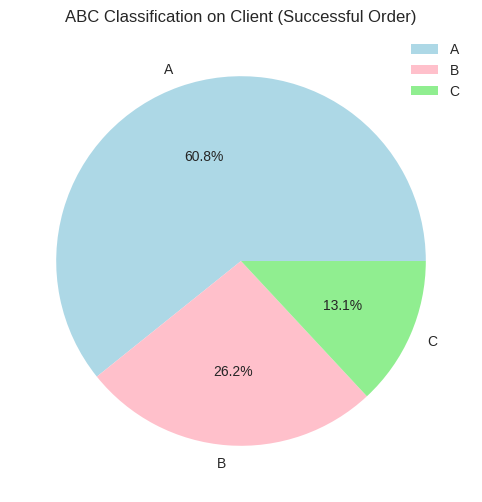

In [476]:
plt.figure(figsize = (12,6))
abc1['Category'].value_counts().plot(kind = 'pie', autopct = "%1.1f%%", colors = ['lightblue', 'pink', 'lightgreen'])
plt.title('ABC Classification on Client (Successful Order)', fontsize = 12)
plt.legend(loc = 'best')
plt.axis('off')
plt.show()

#ABC

In [518]:
a_skus = abc[abc['Category'] == 'A']['Item Code'].unique()
sku_metrics = {}
for sku in a_skus:
    sku_abc = abc[abc['Item Code'] == sku]
    sku_metrics[sku] = {
        'Total Ordered Quantity': sku_abc['Order Qty'].sum(),
        'Total Shipped Quantity': sku_abc['Quantity Shipped'].sum(),
        'Service Level':  (client_abc['Quantity Shipped']/client_abc['Order Qty']).max()
    }

a_clients = abc1[abc1['Category'] == 'A']['Ship To Address No'].unique()
client_metrics = {}
for client in a_clients:
    client_abc = abc1[abc1['Ship To Address No'] == client]
    client_metrics[client] = {
        'Total Ordered Quantity': client_abc['Order Qty'].sum(),
        'Total Shipped Quantity': client_abc['Quantity Shipped'].sum(),
        'Service Level': (client_abc['Quantity Shipped']/client_abc['Order Qty']).max()}

In [520]:
for sku, metrics in sku_metrics.items():
    print(f"SKU: {sku}")
    print(f"Total Ordered Quantity: {metrics['Total Ordered Quantity']}")
    print(f"Total Shipped Quantity: {metrics['Total Shipped Quantity']}")
    print(f"Service Level: {metrics['Service Level']}")
    print("---------------------------")

for client, metrics in client_metrics.items():
    print(f"Client: {client}")
    print(f"Total Ordered Quantity: {metrics['Total Ordered Quantity']}")
    print(f"Total Shipped Quantity: {metrics['Total Shipped Quantity']}")
    print(f"Service Level: {metrics['Service Level']}")
    print("---------------------------")

sku_target = 0.9
client_target = 0.9 
sku_improvement = [sku for sku, metrics in sku_metrics.items() if metrics['Service Level'] < sku_target]
client_improvement = [client for client, metrics in client_metrics.items() if metrics['Service Level'] < client_target]

SKU: 110441
Total Ordered Quantity: 9600.0
Total Shipped Quantity: 9600.0
Service Level: 1.0
Service Level: 1.00
---------------------------
SKU: 111931
Total Ordered Quantity: 15575.0
Total Shipped Quantity: 15575.0
Service Level: 1.0
Service Level: 1.00
---------------------------
SKU: 113106
Total Ordered Quantity: 908.0
Total Shipped Quantity: 908.0
Service Level: 1.0
Service Level: 1.00
---------------------------
SKU: 1029069
Total Ordered Quantity: 188.0
Total Shipped Quantity: 188.0
Service Level: 1.0
Service Level: 1.00
---------------------------
SKU: 1029070
Total Ordered Quantity: 443.0
Total Shipped Quantity: 443.0
Service Level: 1.0
Service Level: 1.00
---------------------------
SKU: 1029071
Total Ordered Quantity: 1361.0
Total Shipped Quantity: 1361.0
Service Level: 1.0
Service Level: 1.00
---------------------------
SKU: 1033341
Total Ordered Quantity: 917.0
Total Shipped Quantity: 917.0
Service Level: 1.0
Service Level: 1.00
---------------------------
SKU: 1038323
To

In [517]:
sku_improvement

[]

In [516]:
client_improvement

[]